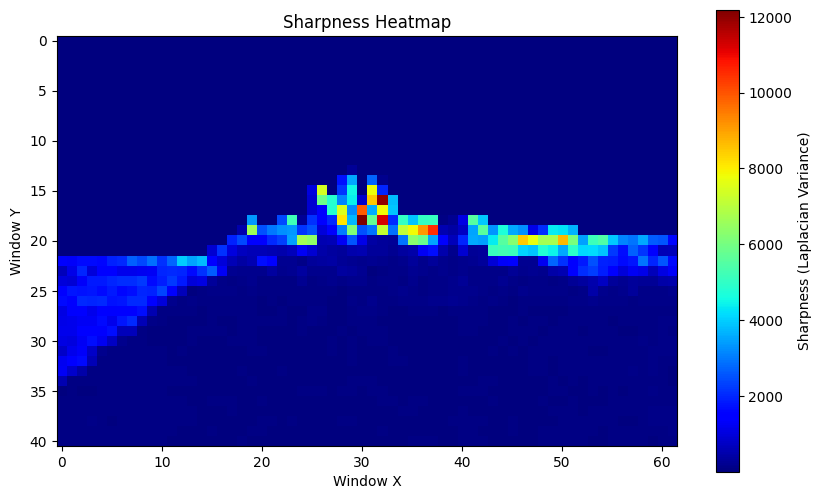

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_sharpness_map(image, window_size=32):
    """
    Computes a sharpness map using the variance of the Laplacian over windows.
    """
    height, width = image.shape
    sharpness_map = np.zeros((height // window_size, width // window_size))

    for y in range(0, height, window_size):
        for x in range(0, width, window_size):
            # Extract window
            window = image[y:y + window_size, x:x + window_size]
            if window.shape[0] != window_size or window.shape[1] != window_size:
                continue  # Skip incomplete windows at the edges

            # Compute Laplacian variance
            laplacian = cv2.Laplacian(window, cv2.CV_64F)
            variance = laplacian.var()

            sharpness_map[y // window_size, x // window_size] = variance

    return sharpness_map

def show_sharpness_heatmap(sharpness_map):
    """
    Displays the heatmap using matplotlib.
    """
    plt.figure(figsize=(10, 6))
    plt.imshow(sharpness_map, cmap='jet', interpolation='nearest')
    plt.colorbar(label='Sharpness (Laplacian Variance)')
    plt.title('Sharpness Heatmap')
    plt.xlabel('Window X')
    plt.ylabel('Window Y')
    plt.show()

def main():
    # Load your image (you can replace this path with your own image)
    image_path = 'Image.jpg'  
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Image not found!")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute sharpness map
    sharpness_map = compute_sharpness_map(gray, window_size=32)

    # Show heatmap
    show_sharpness_heatmap(sharpness_map)

if __name__ == "__main__":
    main()